In [6]:
import os
import sys

# Set root path relative to this notebook (notebooks/run_model.ipynb)
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project root set to: {project_root}")

import numpy as np
import pymc as pm
import arviz as az
import pandas as pd
from IPython.display import display
import graphviz

from utils.explore_data import ROAS, seasonality_plot, trend_plot 
from utils.feature_eng_scaling import feature_eng_scale
from model.bayesian_mmm import build_mmm_model

Project root set to: /Users/ammarmahmood/Documents/Data Science Resources/technical_interviews/Haensel


In [7]:
df = pd.read_csv(os.path.join(project_root,"data/raw/MMM_test_data.csv"))

df['start_of_week'] = pd.to_datetime(
    df['start_of_week'], format='%d-%m-%y'
)
df = df.set_index(df['start_of_week'])

In [8]:
print("Initial overview of the data set: \n")
df.head(7)

Initial overview of the data set: 



,start_of_week,revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7
start_of_week,,,,,,,,,
2020-08-30,2020-08-30,157906.75,2625.48,262.71,12954.12,3609.63,12955.29,12659.12,19379.79
2020-09-06,2020-09-06,186425.68,2634.01,108.66,8760.28,4560.60,12747.70,12338.18,22473.45
2020-09-13,2020-09-13,161607.39,2087.08,110.32,7155.42,4362.96,15015.41,10811.15,22596.05
2020-09-20,2020-09-20,180089.13,1690.70,52.79,15185.22,3883.41,15521.41,12890.22,24728.73
2020-09-27,2020-09-27,217793.98,1547.30,80.56,18524.05,4043.09,15793.74,12642.55,26515.48
2020-10-04,2020-10-04,195581.04,3655.19,525.06,18024.45,9739.47,20804.05,25445.63,30394.41
2020-10-11,2020-10-11,146951.61,6459.43,640.94,24012.09,7048.24,33009.65,33692.83,37544.71


In [9]:
print("The data type and column names: \n")
df.dtypes

The data type and column names: 



start_of_week      datetime64[ns]
revenue                   float64
spend_channel_1           float64
spend_channel_2           float64
spend_channel_3           float64
spend_channel_4           float64
spend_channel_5           float64
spend_channel_6           float64
spend_channel_7           float64
dtype: object

In [10]:
print("Here is a decription of the data frame using the describe function in pandas: \n")
df.describe()

Here is a decription of the data frame using the describe function in pandas: 



,start_of_week,revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7
count,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2021-08-25 12:00:00,136490.190673,1245.604808,343.640962,19507.177981,6915.136731,8575.611442,5063.699038,27701.367404
min,2020-08-30 00:00:00,63207.090000,0.000000,4.370000,5938.130000,3602.200000,747.460000,0.000000,9391.210000
25%,2021-02-26 06:00:00,101675.685000,334.275000,120.470000,13879.000000,5113.937500,2902.032500,0.000000,19797.710000
50%,2021-08-25 12:00:00,128790.460000,856.870000,202.020000,17929.450000,6194.400000,6879.270000,2423.095000,24248.640000
75%,2022-02-21 18:00:00,157707.280000,1658.032500,553.075000,22252.262500,7470.557500,14367.582500,8701.960000,33852.652500
max,2022-08-21 00:00:00,418186.380000,8513.830000,1605.850000,49689.380000,22629.690000,33009.650000,33692.830000,77488.420000
std,NaN,50810.253012,1388.384632,332.988218,8714.759886,3123.172035,6956.787524,6689.472660,12176.293684


In [3]:
ROAS(df)

Total Revenue: 14194980
Total Spend: 7212633
ROAS (Total Revenue / Total Spend): 1.968


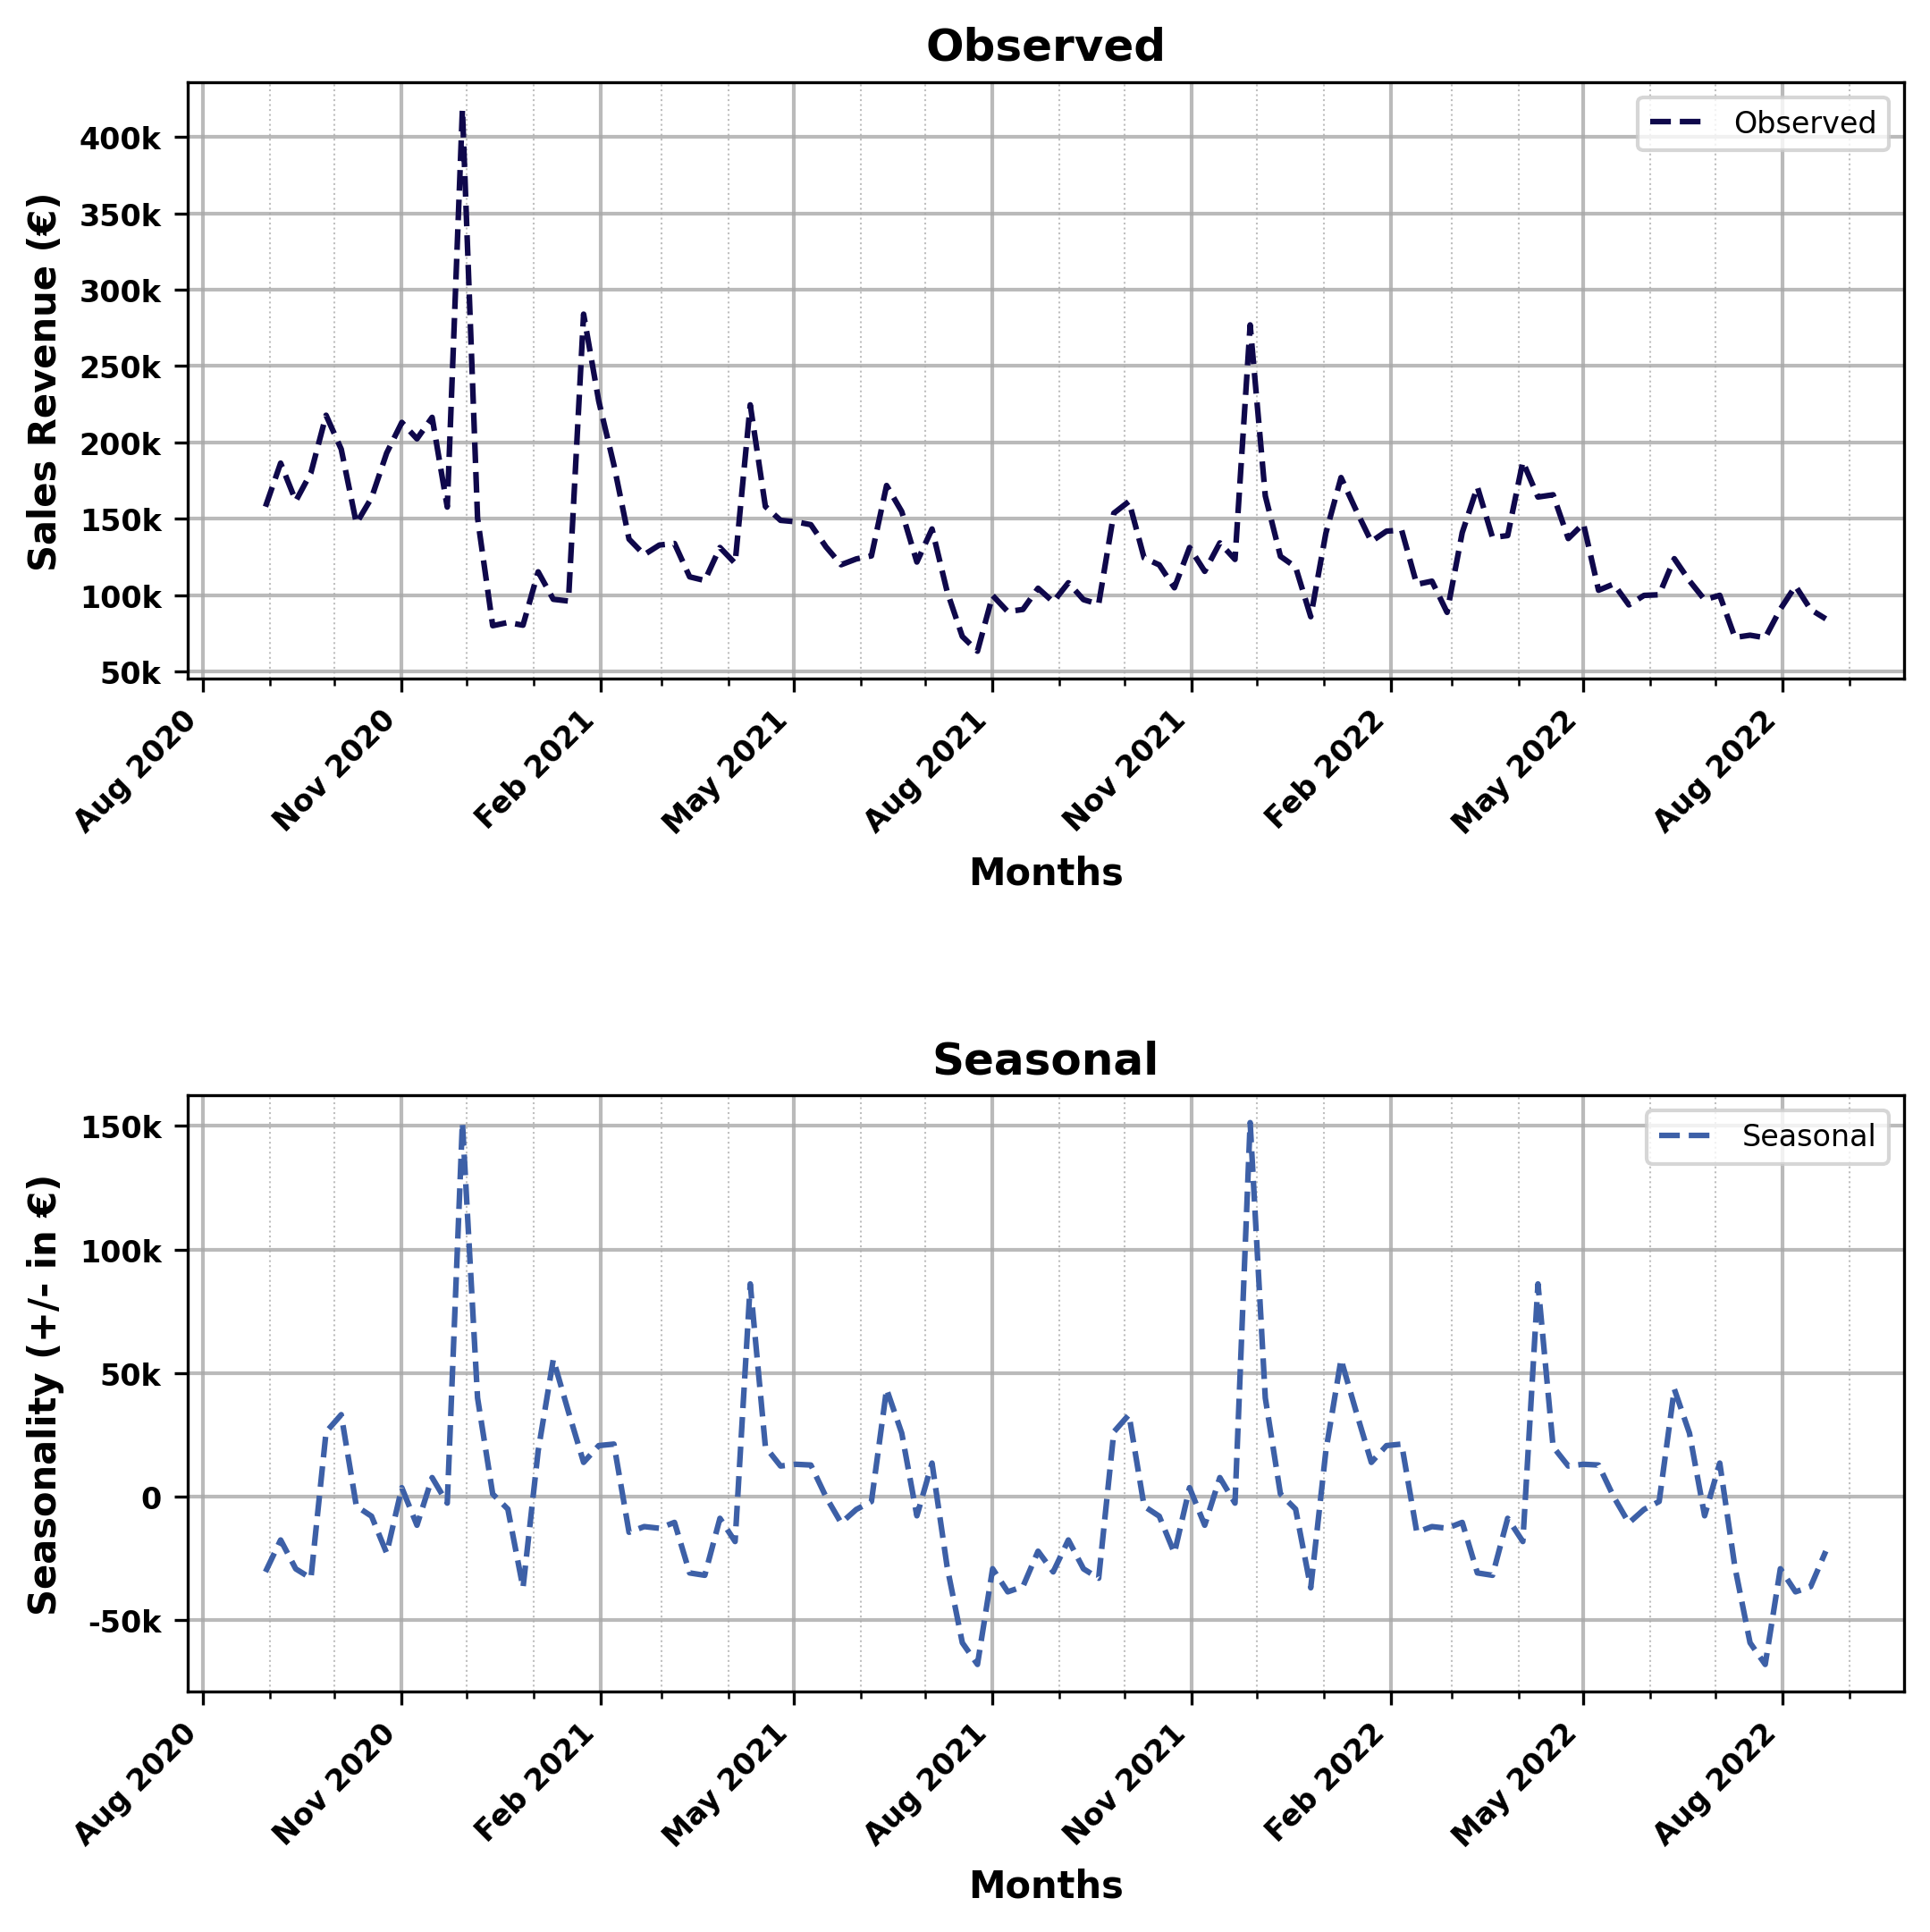

In [3]:
seasonality_plot(df)

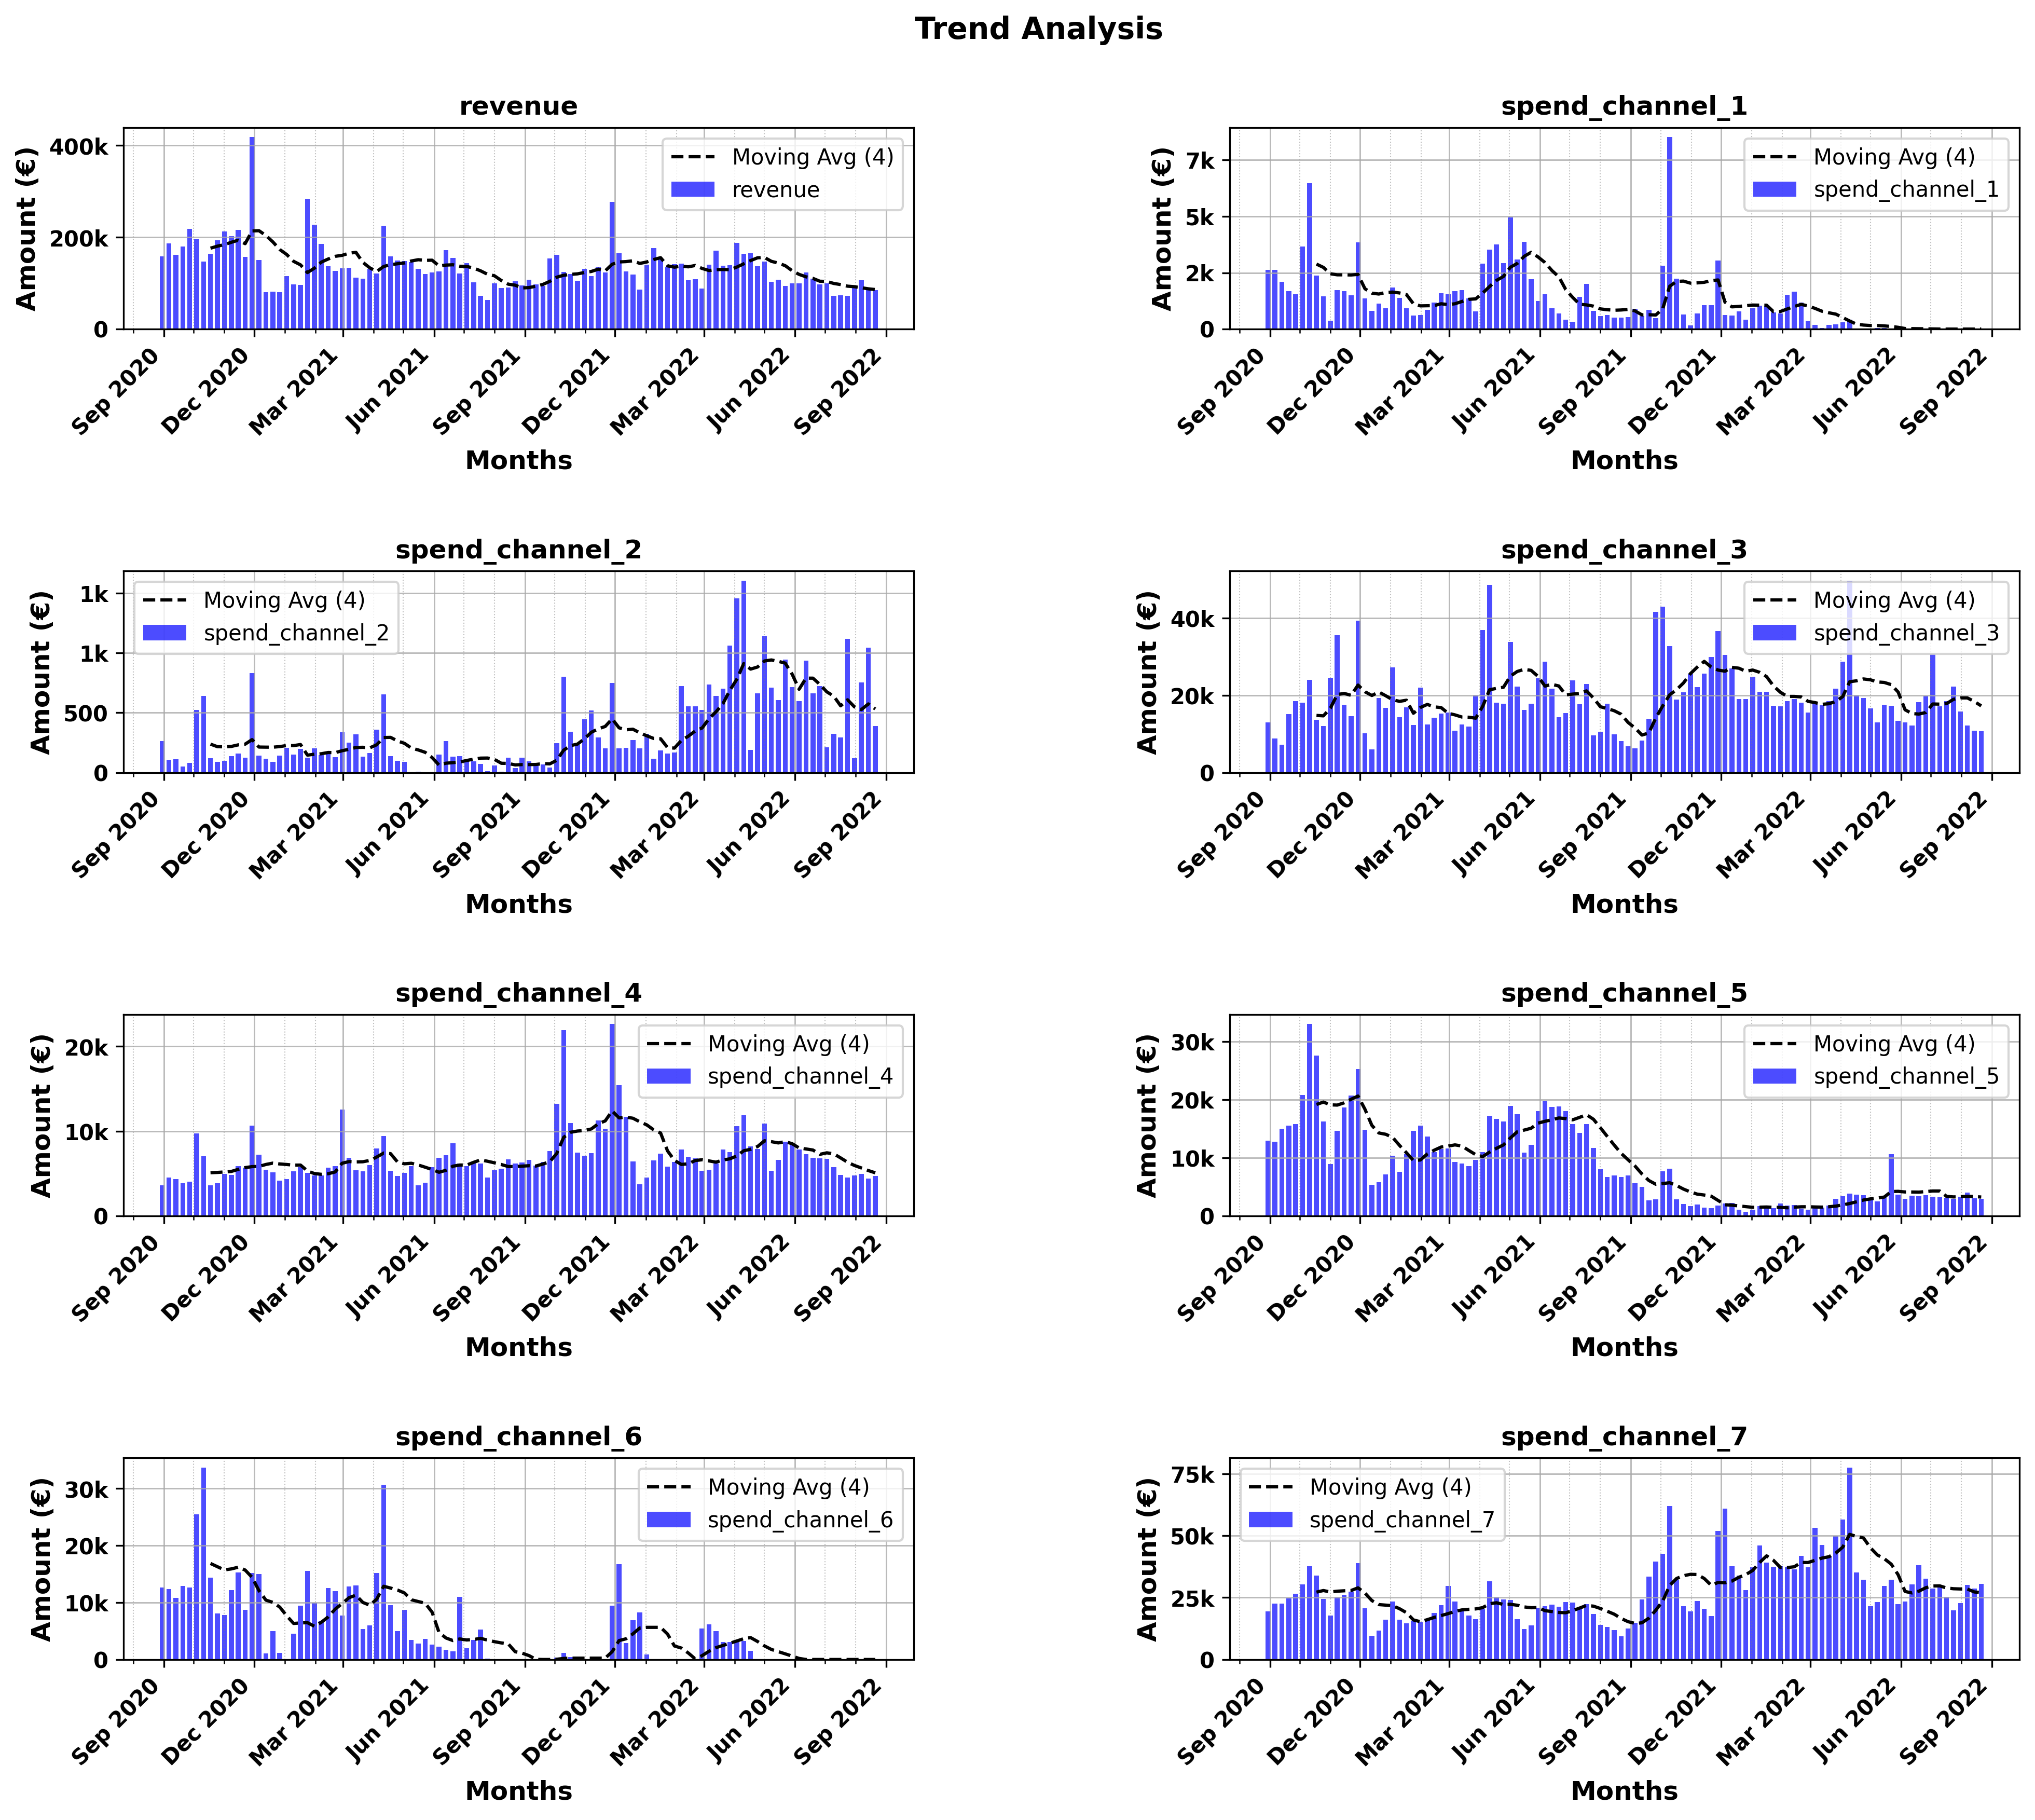

In [3]:
trend_plot(df)

In [3]:
# Outputs processed file to data/processed/
data_path = os.path.join(project_root,"data/processed/")
feature_eng_scale(df, data_path)

/Users/ammarmahmood/Documents/Data Science Resources/technical_interviews/Haensel/utils/feature_eng_scaling.py:76: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  revenue_series = pd.Series(scaled_revenue.ravel(), name='scaled_revenue', index=range(len(df)))


In [8]:
df_processed = pd.read_csv(os.path.join(project_root,"data/processed/mmm_processed_dataset.csv"))
df_processed.head(10)

,start_of_week,scaled_revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7,trend,...,spend_channel_5_lag1,spend_channel_6_lag1,spend_channel_7_lag1,spend_channel_1_lag2,spend_channel_2_lag2,spend_channel_3_lag2,spend_channel_4_lag2,spend_channel_5_lag2,spend_channel_6_lag2,spend_channel_7_lag2
0,2020-08-30,1.156909,2.107795,0.764490,0.664069,0.521990,1.510713,2.499975,0.699597,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-09-06,1.365854,2.114643,0.316202,0.449080,0.659510,1.486506,2.436594,0.811276,1,...,1.510713,2.499975,0.699597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-09-13,1.184022,1.675556,0.321033,0.366810,0.630929,1.750943,2.135030,0.815702,2,...,1.486506,2.436594,0.811276,2.107795,0.764490,0.664069,0.521990,1.510713,2.499975,0.699597
3,2020-09-20,1.319429,1.357333,0.153620,0.778443,0.561581,1.809948,2.545613,0.892690,3,...,1.750943,2.135030,0.815702,2.114643,0.316202,0.449080,0.659510,1.486506,2.436594,0.811276
4,2020-09-27,1.595675,1.242208,0.234431,0.949602,0.584672,1.841704,2.496702,0.957190,4,...,1.809948,2.545613,0.892690,1.675556,0.321033,0.366810,0.630929,1.750943,2.135030,0.815702
5,2020-10-04,1.432931,2.934470,1.527932,0.923991,1.408428,2.425955,5.025107,1.097217,5,...,1.841704,2.496702,0.957190,1.357333,0.153620,0.778443,0.561581,1.809948,2.545613,0.892690
6,2020-10-11,1.076646,5.185778,1.865144,1.230936,1.019248,3.849247,6.653798,1.355338,6,...,2.425955,5.025107,1.097217,1.242208,0.234431,0.949602,0.584672,1.841704,2.496702,0.957190
7,2020-10-18,1.198919,1.900506,0.354673,0.703255,0.520915,3.219593,2.834414,1.226162,7,...,3.849247,6.653798,1.355338,2.934470,1.527932,0.923991,1.408428,2.425955,5.025107,1.097217
8,2020-10-25,1.414352,1.160874,0.266848,0.616504,0.562090,1.894212,1.601663,0.884238,8,...,3.219593,2.834414,1.226162,5.185778,1.865144,1.230936,1.019248,3.849247,6.653798,1.355338
9,2020-11-01,1.561410,0.297197,0.287888,1.256422,0.720495,1.043189,1.547778,0.641440,9,...,1.894212,1.601663,0.884238,1.900506,0.354673,0.703255,0.520915,3.219593,2.834414,1.226162


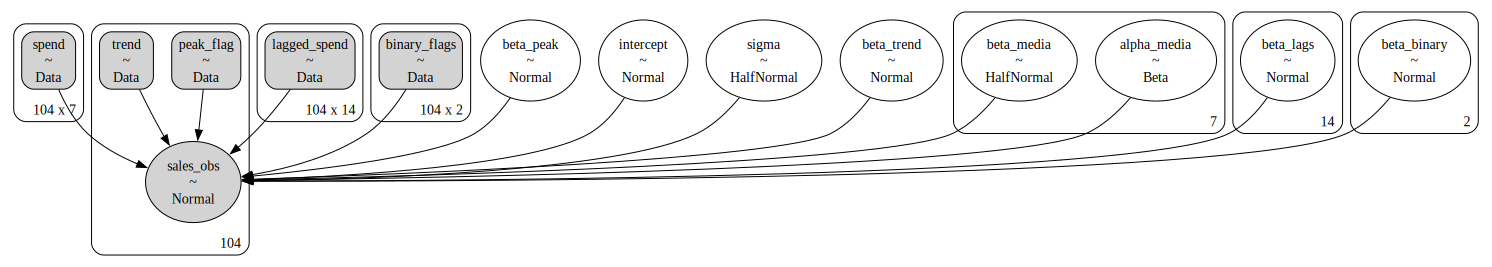

In [9]:
channel_cols = [f'spend_channel_{i+1}' for i in range(7)]
lagged_cols = [col for col in df_processed.columns if "_lag" in col]
binary_cols = ["channel_1_active", "channel_6_active"]

scaled_revenue = df_processed['scaled_revenue'].values
spend_matrix_scaled = df_processed[channel_cols].values
trend = df_processed['trend'].values
peak_flag = df_processed['peak_flag'].values
channel_means = df.loc[:,"spend_channel_1":"spend_channel_7"].mean()
lagged_matrix = df_processed[lagged_cols].values
binary_flags = df_processed[binary_cols].values

model = build_mmm_model(df_processed, channel_means, 
    spend_matrix_scaled, trend, peak_flag, scaled_revenue, lagged_matrix, binary_flags)

# Visualize the model
pm.model_to_graphviz(model)

In [ ]:
with model:
    trace = pm.sample(
        draws=1000,           # Number of samples per chain
        tune=1000,            # Warm-up steps
        chains=4,             # Total chains
        cores=4,              # CPU cores for parallel sampling
        target_accept=0.95,    # Higher acceptance rate for better convergence
        random_seed=42,
        progressbar=True
    )

az.to_netcdf(trace, os.path.join(project_root,"trace/trace_with_lag_binflag.nc"))